In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':[8,8]} , font_scale=1.3)

<h1 style="color:Tomato; font-family:Engravers MT; font-size:250%; " > Bikes problem</h1>



<img src='x2.jpg'>

<h2 style="color:Tomato; font-family:Times New Roman; font-size:170%; " ><u> Problem Definition</u></h2>

<p style="font-family:Times New Roman; color=black; font-size:18px;">
    The project is about rented bikes. 
    In this project, we're looking to predict the profit per day for casual & registered customers       depending on season , weather , holiday or workingday and the windspeed.  
</p>

In [2]:
df = pd.read_csv("bikes.csv")
df.head()


,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1


- **datatime** : data and time for an hour a day.
- **Register** user rent bike for 5 dollar / HOUR  
- **Casual** user rent bike for 20 dollar / HOUR
- **Taxes** 0.14%
- **Maintanance** 3000/year.


<h1 style="color:Tomato; font-family:Engravers MT; font-size:200%; " > Data Analysis </h1>

<ul style="color:black; font-size:120%;">
    <li>Make Profite fretures.</li>
    <li>Distribution rental_bikes_count and profit.</li>
    <li>profit for each day</li>
    <li>which season has more registration and profit</li>
    <li>correlation profit and bikes_counts with all features</li>
    <li>rental during rush hour(7:9 am) and (3:5 pm)</li>
    <li>which weather cond has more registration and profit</li>
    <li>rental during work and holiday</li>
    <li>register or casual is more</li>
    <li>avg of bikes of registered per week</li>
    <li>schools (9-12) and (2-6) profit </li>
    <li>profit of 2011 & saturday &season fall</li>
    
</ul>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [4]:
1500/(365*24)

0.17123287671232876

### 1- Make Profite features 


In [5]:
def calc_profit(row):
    cash = row['casual'] * 20 + row['registered'] * 5
    cash_w_tax = cash - (cash * 0.14)
    logistics_per_hour = 3000 / (365 * 24)
    net_profit = cash_w_tax - logistics_per_hour
    return net_profit
    

In [6]:
df['profit'] = df.apply(calc_profit, axis=1)


In [7]:
df


,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.157534
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,274.857534
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.757534
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.257534
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,3.957534
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.757534
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1164.957534
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.657534
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.157534


### 2- Distribution rental_bikes_count and profit

In [8]:
df[['rented_bikes_count','profit']].corr()

,rented_bikes_count,profit
rented_bikes_count,1.00000,0.93449
profit,0.93449,1.00000


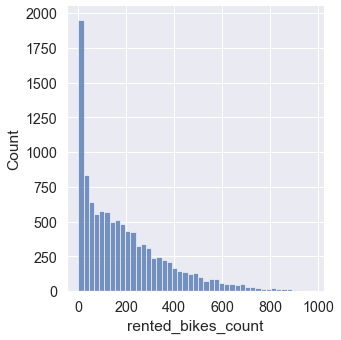

In [9]:
sns.displot(df['rented_bikes_count'])

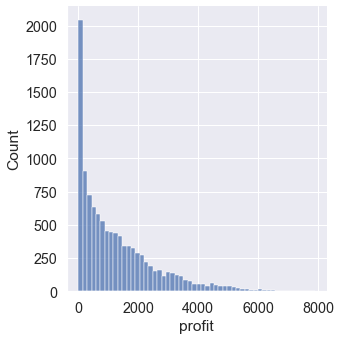

In [10]:
sns.displot(df['profit'])

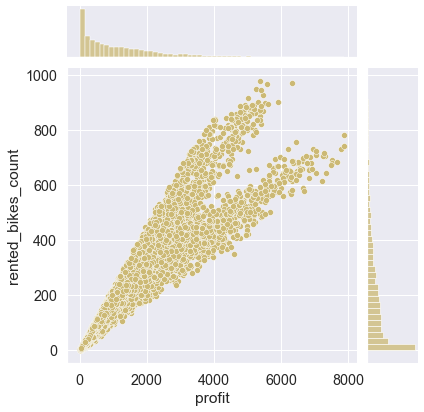

In [11]:
sns.jointplot(x='profit',y='rented_bikes_count', color='y' ,data=df)

In [12]:
df['rented_bikes_count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: rented_bikes_count, dtype: float64

In [13]:
df[df['rented_bikes_count'] == df['rented_bikes_count'].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
9345,2012-09-12 18:00:00,Fall,0.0,NaN,Clear,27.06,NaN,16.9979,91,886,977,5374.657534


In [14]:
df[df['profit'] == df['profit'].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
9415,2012-09-15 16:00:00,Fall,0.0,0.0,Mist,NaN,36.0,15.0013,350,433,783,7881.557534


In [15]:
df['profit'].describe()

count    10886.000000
mean      1288.109518
std       1309.683400
min          3.957534
25%        253.357534
50%        889.757534
75%       1891.657534
max       7881.557534
Name: profit, dtype: float64

### 3- profit for each day (per week)

Day od week:

1-6

day of month:

1-30

day of year:

1-365

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  profit              10886 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1020.7+ KB


In [17]:
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S' , errors='coerce')

In [18]:
df['day'] = df['datetime'].dt.day_name() 
df['month'] = df['datetime'].dt.month
df['month_name'] = df['datetime'].dt.month_name()
df['year'] = df['datetime'].dt.year 
df['hour'] = df['datetime'].dt.hour

In [19]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,day,month,month_name,year,hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.157534,Saturday,1,January,2011,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,274.857534,Saturday,1,January,2011,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.757534,Saturday,1,January,2011,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.257534,Saturday,1,January,2011,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,3.957534,Saturday,1,January,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.757534,Wednesday,12,December,2012,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1164.957534,Wednesday,12,December,2012,20
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.657534,Wednesday,12,December,2012,21
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.157534,Wednesday,12,December,2012,22


In [20]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [21]:
df['day'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [22]:
df.groupby('day').describe()[['profit','rented_bikes_count']].transpose()

day                            Friday       Monday     Saturday       Sunday  \
profit             count  1529.000000  1551.000000  1584.000000  1579.000000   
                   mean   1250.313519  1203.324846  1666.081272  1513.230302   
                   std    1110.019552  1129.727600  1772.625088  1571.404307   
                   min       3.957534     3.957534     3.957534     3.957534   
                   25%     300.657534   249.057534   283.457534   287.757534   
                   50%    1035.957534   954.257534   956.407534   812.357534   
                   75%    1891.657534  1827.157534  2614.057534  2429.157534   
                   max    5907.857534  5593.957534  7881.557534  7034.457534   
rented_bikes_count count  1529.000000  1551.000000  1584.000000  1579.000000   
                   mean    197.844343   190.390716   196.665404   180.839772   
                   std     172.518208   180.943376   180.917795   167.022145   
                   min       1.000000     1.000000     1.000000     1.000000   
                   25%      52.000000    39.000000    45.000000    43.000000   
                   50%     167.000000   146.000000   141.500000   119.000000   
                   75%     290.000000   277.500000   309.500000   298.000000   
                   max     900.000000   968.000000   783.000000   757.000000   

day                          Thursday      Tuesday    Wednesday  
profit             count  1553.000000  1539.000000  1551.000000  
                   mean   1157.722570  1111.901849  1100.354955  
                   std    1086.029849  1065.481400  1111.243780  
                   min       3.957534     3.957534     3.957534  
                   25%     236.157534   210.357534   210.357534  
                   50%     911.257534   833.857534   790.857534  
                   75%    1741.157534  1704.607534  1657.307534  
                   max    5533.757534  6337.857534  5447.757534  
rented_bikes_count count  1553.000000  1539.000000  1551.000000  
                   mean    197.296201   189.723847   188.411348  
                   std     187.606619   186.719673   190.942004  
                   min       1.000000     1.000000     1.000000  
                   25%      44.000000    36.000000    38.000000  
                   50%     155.000000   146.000000   136.000000  
                   75%     280.000000   274.000000   270.500000  
                   max     901.000000   970.000000   977.000000

### 4- which season has more registration and profit




In [23]:
df.groupby('season').describe()['profit'] 
#profit of spring is very bad

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,2680.0,1682.401564,1429.092535,3.957534,445.782534,1412.207534,2472.157534,7881.557534
Spring,2634.0,696.979098,850.960767,3.957534,128.657534,436.107534,914.482534,7679.457534
Summer,2670.0,1533.077796,1454.120645,3.957534,317.857534,1212.257534,2244.257534,7795.557534
Winter,2688.0,1222.303665,1184.508417,3.957534,292.057534,934.907534,1750.832534,7864.357534


In [24]:
df.groupby('season').describe()['rented_bikes_count']

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,2680.0,234.471642,197.122029,1.0,68.0,195.0,348.00,977.0
Spring,2634.0,116.089218,125.353298,1.0,23.0,78.0,163.00,801.0
Summer,2670.0,214.711610,192.109412,1.0,47.0,171.5,321.75,873.0
Winter,2688.0,198.672247,177.491672,1.0,51.0,161.0,294.00,948.0


In [25]:
df.groupby('weather').describe()['profit'].transpose()

weather,Clear,Mist,Rainy,Snowy
count,5793.000000,2259.000000,693.000000,1.000000
mean,1391.629069,1170.843147,735.187116,782.257534
std,1372.771954,1164.297225,925.280928,NaN
min,3.957534,3.957534,3.957534,782.257534
25%,283.457534,244.757534,128.657534,782.257534
50%,1005.857534,833.857534,399.557534,782.257534
75%,2055.057534,1758.357534,932.757534,782.257534
max,7795.557534,7881.557534,5542.357534,782.257534


### 5-correlation profit and bikes_counts with all features

In [26]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'day', 'month', 'month_name', 'year', 'hour'],
      dtype='object')

In [27]:
df.corr()[['profit' , 'rented_bikes_count']]
#profit with humidity علاقه عكسيه

,profit,rented_bikes_count
holiday,0.017410,-0.005827
workingday,-0.150218,0.010940
temp,0.462618,0.391867
humidity,-0.358150,-0.317282
windspeed,0.100205,0.097747
casual,0.902713,0.690414
registered,0.822156,0.970948
rented_bikes_count,0.934490,1.000000
profit,1.000000,0.934490
month,0.144868,0.166862


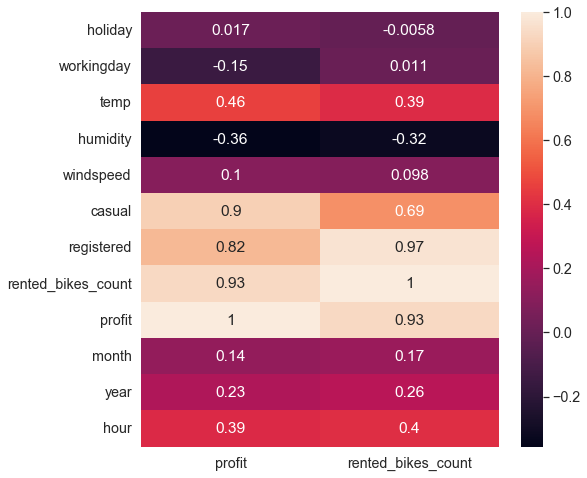

In [28]:
sns.heatmap(df.corr()[['profit' , 'rented_bikes_count']] ,annot=True)

In [29]:
#rental during rush hour(7:9 am) and (3:5 pm)


In [30]:
def is_rushHour(h):
    if h in[7,8,9,15,16,17]:
        return 1
    else:
        return 0

In [31]:
df['rushHour']=df['hour'].apply(is_rushHour)

In [32]:
df[df['rushHour']==1]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,day,month,month_name,year,hour,rushHour
7,2011-01-01 07:00:00,Spring,0.0,0.0,Clear,8.20,NaN,NaN,1,2,3,25.457534,Saturday,1,January,2011,7,1
8,2011-01-01 08:00:00,Spring,0.0,0.0,NaN,9.84,NaN,0.0000,1,7,8,46.957534,Saturday,1,January,2011,8,1
9,2011-01-01 09:00:00,Spring,0.0,0.0,Clear,NaN,76.0,0.0000,8,6,14,163.057534,Saturday,1,January,2011,9,1
15,2011-01-01 15:00:00,Spring,0.0,0.0,Mist,18.04,77.0,19.9995,40,70,110,988.657534,Saturday,1,January,2011,15,1
16,2011-01-01 16:00:00,Spring,0.0,0.0,Mist,17.22,82.0,19.9995,41,52,93,928.457534,Saturday,1,January,2011,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,2012-12-19 08:00:00,Winter,0.0,1.0,Clear,NaN,87.0,NaN,13,665,678,3082.757534,Wednesday,12,December,2012,8,1
10871,2012-12-19 09:00:00,Winter,0.0,1.0,Clear,NaN,NaN,NaN,8,309,317,1465.957534,Wednesday,12,December,2012,9,1
10877,2012-12-19 15:00:00,Winter,NaN,1.0,Clear,NaN,50.0,19.0012,28,209,237,1379.957534,Wednesday,12,December,2012,15,1
10878,2012-12-19 16:00:00,Winter,0.0,1.0,Clear,NaN,50.0,NaN,37,297,334,1913.157534,Wednesday,12,December,2012,16,1


In [33]:
df.groupby('rushHour').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
rushHour,,,,,,,,
0,8153.0,1069.503125,1217.987206,3.957534,158.757534,644.657534,1547.657534,7864.357534
1,2733.0,1940.249265,1356.260623,3.957534,937.057534,1689.557534,2622.657534,7881.557534


In [34]:
df.groupby('rushHour').describe()['rented_bikes_count']

,count,mean,std,min,25%,50%,75%,max
rushHour,,,,,,,,
0,8153.0,153.140562,158.808647,1.0,26.0,108.0,225.0,977.0
1,2733.0,306.227955,194.740685,1.0,157.0,276.0,420.0,970.0


### 6-rental during work and holiday

In [35]:
df.groupby('workingday').describe()['rented_bikes_count']

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0.0,3021.0,188.369083,173.488936,1.0,43.0,129.0,304.0,783.0
1.0,6367.0,192.613162,184.815639,1.0,41.0,150.0,276.0,970.0


In [36]:
df.groupby('holiday').describe()['rented_bikes_count']

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0.0,9738.0,191.662662,181.998224,1.0,41.25,145.0,283.0,977.0
1.0,292.0,185.369863,166.583210,2.0,38.75,139.0,305.0,712.0


In [37]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'day', 'month', 'month_name', 'year', 'hour', 'rushHour'],
      dtype='object')

### 7- register or casual is more


In [38]:
df.corr()[['profit','rented_bikes_count']].loc[['casual','registered']]

,profit,rented_bikes_count
casual,0.902713,0.690414
registered,0.822156,0.970948


### 8-avg of rented bikes per week

In [39]:
df.groupby('day').mean()[['profit','rented_bikes_count']]

,profit,rented_bikes_count
day,,
Friday,1250.313519,197.844343
Monday,1203.324846,190.390716
Saturday,1666.081272,196.665404
Sunday,1513.230302,180.839772
Thursday,1157.722570,197.296201
Tuesday,1111.901849,189.723847
Wednesday,1100.354955,188.411348


In [40]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

### 9- schools (9-12) and (2-6) profit

In [41]:
def is_school_day(m):
    if m in ['September' , 'October', 'November', 'December' , 'February', 'March', 'April', 'May', 'June']:
        return 1
    else:
        return 0
df['is_schoolday']=df['month'].apply(is_school_day)

In [42]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,day,month,month_name,year,hour,rushHour,is_schoolday
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.157534,Saturday,1,January,2011,0,0,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,274.857534,Saturday,1,January,2011,1,0,0
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.757534,Saturday,1,January,2011,2,0,0
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.257534,Saturday,1,January,2011,3,0,0
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,3.957534,Saturday,1,January,2011,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.757534,Wednesday,12,December,2012,19,0,0
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1164.957534,Wednesday,12,December,2012,20,0,0
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.657534,Wednesday,12,December,2012,21,0,0
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.157534,Wednesday,12,December,2012,22,0,0


In [43]:
df.groupby('is_schoolday').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
is_schoolday,,,,,,,,
0,10886.0,1288.109518,1309.6834,3.957534,253.357534,889.757534,1891.657534,7881.557534


### 12. profit of 2011 & saturday &season fall

In [44]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'day', 'month', 'month_name', 'year', 'hour', 'rushHour',
       'is_schoolday'],
      dtype='object')

In [45]:
#df al 3ashan 3shan al condition
df[(df['year']==2011)&(df['day']=='Saturday')&(df['season']=='Fall')][['profit','rented_bikes_count']].sum()

profit                351663.058904
rented_bikes_count     38354.000000
dtype: float64

<h1 style="color:Tomato; font-family:Engravers MT; font-size:200%; " > Data Visualization </h1>    

**Numeric features - Univariate**
- temp
- humidity
- windspeed
- casual
- registerd
- rentedbike
- profit

In [46]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'day', 'month', 'month_name', 'year', 'hour', 'rushHour',
       'is_schoolday'],
      dtype='object')

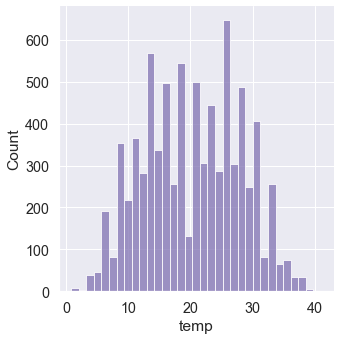

In [47]:
sns.displot(data=df ,x='temp' ,kde=False,color='m')

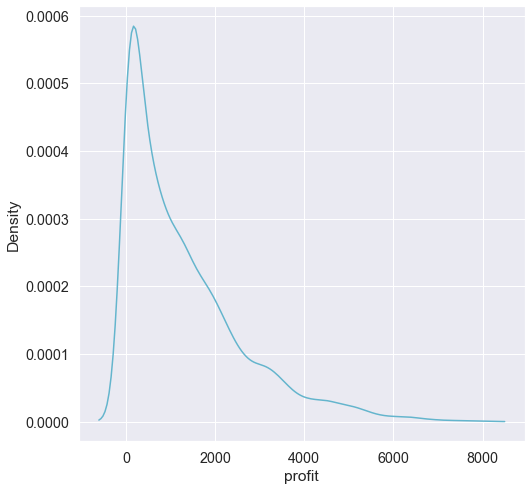

In [48]:
sns.kdeplot(data=df , x='profit' , color='c')

**Numeric features - Bivariate**


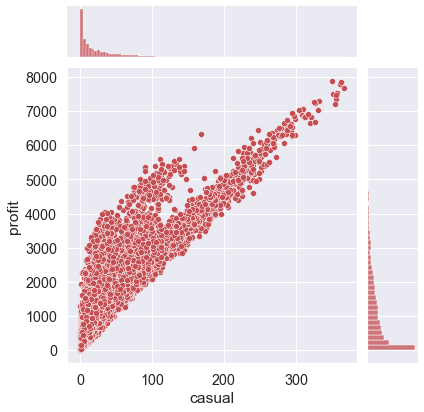

In [49]:
sns.jointplot(x='casual' , y='profit' , data=df , color='r')

**Categorical features - Univariate**
- season
- holiday
- workingday
- hour
- month
- year
- day
- rushHour
- is_schoolday

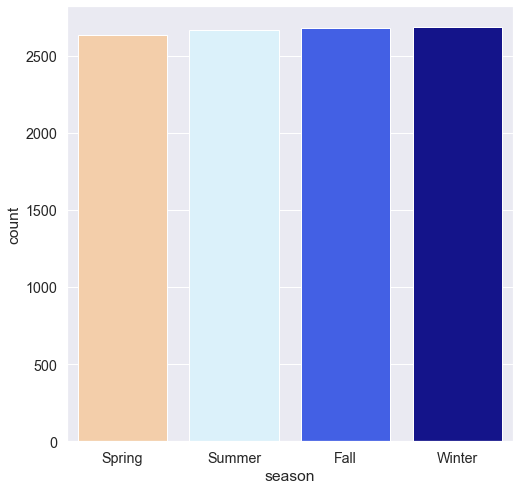

In [50]:
sns.countplot(data=df , x='season' ,palette='flag')

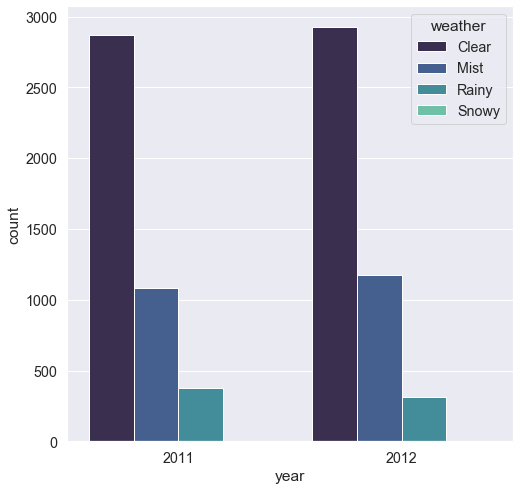

In [51]:
sns.countplot(data=df , x='year' , palette='mako' , hue='weather') #hue for more details on flow

**Categorical features - Bivariate**

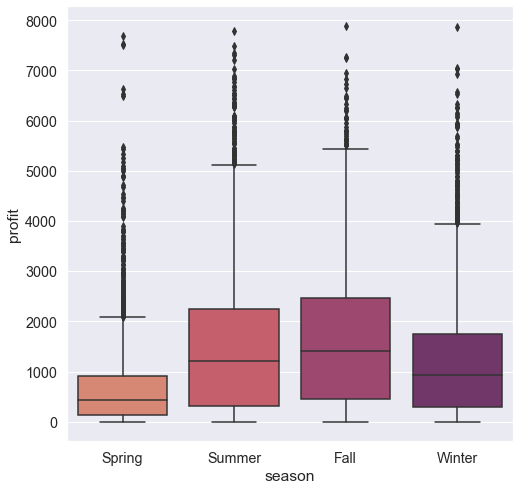

In [52]:
sns.boxplot(x='season' , y='profit' ,data=df , palette='flare')

**Matrix plot ( heatmap)**

In [53]:
new_df = pd.pivot_table(values='profit' ,index='month' , columns='day' , data=df)

In [54]:
new_df

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,561.951151,390.927038,582.952534,506.997394,565.812156,471.100054,422.777534
2,720.075265,575.178587,663.290868,565.414677,561.110351,537.412619,589.756830
3,819.049788,968.250755,1401.547118,1258.822492,873.072323,759.131484,865.475181
4,1154.279201,1346.889929,1563.925868,1901.511701,1298.329201,1145.756840,1017.276022
5,1653.831701,1172.805034,2287.795034,1791.252534,1477.095729,1251.823506,1189.234618
6,1574.831145,1474.557534,2399.296423,2142.371423,1421.990034,1441.268368,1451.086701
7,1685.436701,1703.831145,2129.089201,1874.666562,1606.961701,1472.288090,1682.211701
8,1620.339479,1475.847534,2177.034201,1696.760034,1571.128368,1530.959201,1557.541562
9,1501.719201,1599.287604,2141.714479,2215.292256,1217.749971,1293.849131,1420.771701


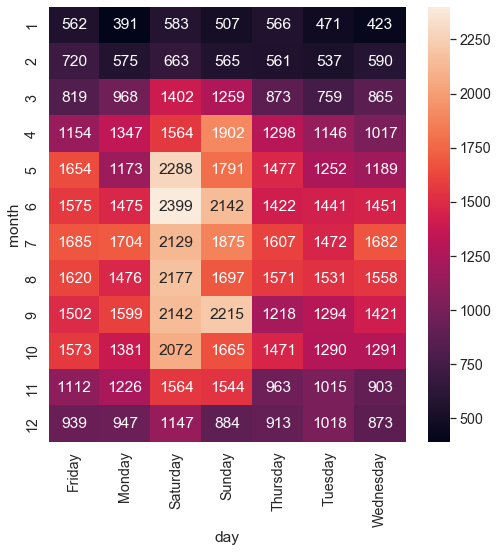

In [55]:
sns.heatmap(new_df , annot=True , fmt='.0f' ,) #0.0f for رقم صحيح

<h1 style="color:Tomato; font-family:Engravers MT; font-size:200%; " > Data preprocessing </h1>

- Data cleaning or cleansing
- work with mising data
- work with categorical data
- Detect and handle outliers
- Split data into train and test
- feaure scaling

**Data cleaning or cleansing**

In [56]:
#check negative in numbers like tall and weight
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,month,year,hour,rushHour,is_schoolday
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132,1288.109518,6.521495,2011.501929,11.541613,0.251056,0.0
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454,1309.683400,3.444373,0.500019,6.915838,0.433641,0.0
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000,3.957534,1.000000,2011.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000,253.357534,4.000000,2011.000000,6.000000,0.000000,0.0
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000,889.757534,7.000000,2012.000000,12.000000,0.000000,0.0
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000,1891.657534,10.000000,2012.000000,18.000000,1.000000,0.0
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000,7881.557534,12.000000,2012.000000,23.000000,1.000000,0.0


In [57]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'day', 'month', 'month_name', 'year', 'hour', 'rushHour',
       'is_schoolday'],
      dtype='object')

In [58]:
# check if numeric has object data type
for col in['temp','humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count','profit']:
    df[col]=pd.to_numeric(df[col] , errors='coerce') #nan for string values
    

In [59]:
#check categorical values
for col in ['season', 'holiday', 'workingday', 'weather','day', 'month', 'year', 'hour', 'rushHour', 'is_schoolday']:
    print(f'----{col}----')
    print(df[col].unique())
    print('__________________________________')
    print()

----season----
['Spring' nan 'Summer' 'Fall' 'Winter']
__________________________________

----holiday----
[ 0. nan  1.]
__________________________________

----workingday----
[ 0. nan  1.]
__________________________________

----weather----
['Clear' nan 'Mist' 'Rainy' 'Snowy']
__________________________________

----day----
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
__________________________________

----month----
[ 1  2  3  4  5  6  7  8  9 10 11 12]
__________________________________

----year----
[2011 2012]
__________________________________

----hour----
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
__________________________________

----rushHour----
[0 1]
__________________________________

----is_schoolday----
[0]
__________________________________



**Work with mising data**

In [60]:
df.isna().sum()
#drop col (if aktr mn nos el data)
#or drop row
#or impute
# float feature --> mean or median(if outliers)
# int feature --> median
# catg feature --> mode

datetime                 0
season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
profit                   0
day                      0
month                    0
month_name               0
year                     0
hour                     0
rushHour                 0
is_schoolday             0
dtype: int64

In [61]:
#wind speed is useless
df.drop('windspeed' , axis=1 , inplace=True)

In [62]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,casual,registered,rented_bikes_count,profit,day,month,month_name,year,hour,rushHour,is_schoolday
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,3,13,16,107.157534,Saturday,1,January,2011,0,0,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,8,32,40,274.857534,Saturday,1,January,2011,1,0,0
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,5,27,32,201.757534,Saturday,1,January,2011,2,0,0
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,3,10,13,94.257534,Saturday,1,January,2011,3,0,0
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,0,1,1,3.957534,Saturday,1,January,2011,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,7,329,336,1534.757534,Wednesday,12,December,2012,19,0,0
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,10,231,241,1164.957534,Wednesday,12,December,2012,20,0,0
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,4,164,168,773.657534,Wednesday,12,December,2012,21,0,0
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,12,117,129,709.157534,Wednesday,12,December,2012,22,0,0


In [63]:
#drop nan val from season
df.dropna(subset=['season'] , inplace=True)

In [64]:
df.isna().sum()

datetime                 0
season                   0
holiday                834
workingday            1474
weather               2093
temp                  2732
humidity              3367
casual                   0
registered               0
rented_bikes_count       0
profit                   0
day                      0
month                    0
month_name               0
year                     0
hour                     0
rushHour                 0
is_schoolday             0
dtype: int64

In [65]:
#we can filling data with sklearn or pandas , (sklearn is better)
# imputer can be knn or simpleImputer(mean,median,mode)
from sklearn.impute import SimpleImputer
imputer2 = SimpleImputer(strategy='most_frequent')


In [66]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [67]:
df['holiday']=imputer.fit_transform(df[['holiday']])

In [68]:
df['workingday']=imputer.fit_transform(df[['workingday']])

In [69]:
#df['weather']=imputer.fit_transform(df[['weather']]) --> error because of catg
df['temp']=imputer.fit_transform(df[['temp']])
df['humidity']=imputer.fit_transform(df[['humidity']])


In [70]:
df['weather']=imputer2.fit_transform(df[['weather']])

**work with categorical data**

In [71]:
df=df[['season','holiday' , 'workingday','weather' , 'temp' , 'humidity' ,'rented_bikes_count','profit','month','day','hour']]

In [72]:
df

,season,holiday,workingday,weather,temp,humidity,rented_bikes_count,profit,month,day,hour
0,Spring,0.000000,0.0,Clear,9.840000,81.000000,16,107.157534,1,Saturday,0
1,Spring,0.000000,0.0,Clear,9.020000,80.000000,40,274.857534,1,Saturday,1
2,Spring,0.000000,0.0,Clear,9.020000,61.849829,32,201.757534,1,Saturday,2
3,Spring,0.000000,0.0,Clear,9.840000,75.000000,13,94.257534,1,Saturday,3
6,Spring,0.000000,0.0,Clear,20.299854,61.849829,2,34.057534,1,Saturday,6
...,...,...,...,...,...,...,...,...,...,...,...
10880,Winter,0.000000,1.0,Clear,15.580000,61.849829,569,2743.057534,12,Wednesday,18
10881,Winter,0.000000,1.0,Clear,15.580000,50.000000,336,1534.757534,12,Wednesday,19
10882,Winter,0.000000,1.0,Clear,14.760000,61.849829,241,1164.957534,12,Wednesday,20
10884,Winter,0.028868,1.0,Clear,13.940000,61.849829,129,709.157534,12,Wednesday,22


In [73]:
#one hot encoding (nominal val)
df=pd.get_dummies(df, columns=['season' ,'weather','day'],drop_first=True)

In [74]:
df.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'rented_bikes_count',
       'profit', 'month', 'hour', 'season_Spring', 'season_Summer',
       'season_Winter', 'weather_Mist', 'weather_Rainy', 'weather_Snowy',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object')

**Detect and handle outliers**

In [75]:
df.describe()[['temp', 'humidity', 'rented_bikes_count','profit']]

,temp,humidity,rented_bikes_count,profit
count,10672.000000,10672.000000,10672.000000,10672.000000
mean,20.299854,61.849829,191.292541,1285.939759
std,6.742300,15.939712,181.138368,1309.566790
min,0.820000,0.000000,1.000000,3.957534
25%,16.400000,54.000000,42.000000,249.057534
50%,20.299854,61.849829,144.000000,885.457534
75%,24.600000,70.000000,283.000000,1888.432534
max,41.000000,100.000000,977.000000,7881.557534


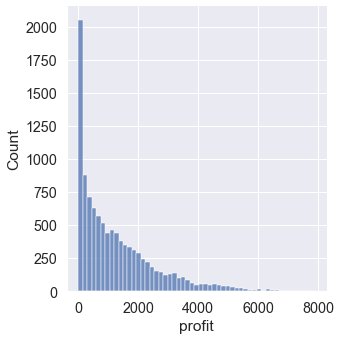

In [76]:
sns.displot(df['profit'] , kde=False) #not has outliers

**Split data into train and test**

In [77]:
x= df.drop('profit' , axis=1)
y=df['profit']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split( x , y , test_size=0.2)

In [80]:
X_train.shape

(8537, 19)

In [81]:
y_train.shape

(8537,)

**feaure scaling**

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [83]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

<h1 style="color:Tomato; font-family:Engravers MT; font-size:200%; " > Machine Learning </h1>

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [85]:
models ={
    'LR' : LinearRegression(),
    'KNNR' : KNeighborsRegressor(),
    'SVR' : SVR(),
    'DT' : DecisionTreeRegressor(),
    'RF' : RandomForestRegressor(),
    'XGBR' : XGBRegressor()
    
}

In [86]:
for name,model in models.items():
    print(f'Using model: {name}')
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    print(f'Training score : {model.score(X_train , y_train)}')#for over over fitting or under fitting
    print(f'Testing score : {model.score(X_test , y_test)}')#--->^-^
    print(f'RMSE : {np.sqrt(mean_squared_error(y_test , y_pred))}')
    print(f'MAE : {mean_absolute_error(y_test , y_pred)}')
    print(f'R2 : {r2_score(y_test , y_pred)}')

    print('_'*30)

Using model: LR
Training score : 0.9133723795281083
Testing score : 0.9110805334307885
RMSE : 377.89469417005563
MAE : 268.3076248763887
R2 : 0.9110805334307885
______________________________
Using model: KNNR
Training score : 0.9522426757101661
Testing score : 0.9174475408726134
RMSE : 364.1139997210771
MAE : 240.98126463700234
R2 : 0.9174475408726134
______________________________
Using model: SVR
Training score : 0.16144589111707264
Testing score : 0.17210404452305017
RMSE : 1153.082153106913
MAE : 777.9066497637622
R2 : 0.17210404452305017
______________________________
Using model: DT
Training score : 1.0
Testing score : 0.9633810385945939
RMSE : 242.50761540952882
MAE : 141.99868852459016
R2 : 0.9633810385945939
______________________________
Using model: RF
Training score : 0.9974017189592985
Testing score : 0.9813031709132031
RMSE : 173.2831559128703
MAE : 104.7244355971897
R2 : 0.9813031709132031
______________________________
Using model: XGBR
Training score : 0.9967250048555